<a href="https://colab.research.google.com/github/hayleypc/OR-Lookout_Fire/blob/Log-decomposition/log_decomp_postfire_combustion_reduction_analysis_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-posthocs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

In [3]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv('/content/combustion_effects_log_spp.csv')

In [5]:
df['fire_reduction_percent'] = df['fire_reduction_percent'].round(1)

In [6]:
display(df.head())

,site,log_id,species,fire_reduction_percent
0,6,458,ABAM,81.5
1,6,460,ABAM,100.0
2,6,461,ABAM,100.0
3,6,466,ABAM,100.0
4,6,467,ABAM,74.3


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   site                    265 non-null    int64  
 1   log_id                  265 non-null    int64  
 2   species                 265 non-null    object 
 3   fire_reduction_percent  265 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.4+ KB
None


In [24]:
# Summary stats by site - fire reduction percentage
print("Summary Stats by Site - fire reduction percentage:")
site_summary = df.groupby('site')['fire_reduction_percent'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(1)

# Add SE and quantiles
site_summary['sem'] = (df.groupby('site')['fire_reduction_percent'].sem()).round(1)
site_summary['25%'] = (df.groupby('site')['fire_reduction_percent'].quantile(0.25)).round(1)
site_summary['50%'] = (df.groupby('site')['fire_reduction_percent'].quantile(0.50)).round(1)
site_summary['75%'] = (df.groupby('site')['fire_reduction_percent'].quantile(0.75)).round(1)

# Reorder columns
site_summary = site_summary[['count', 'mean', 'median', 'std', 'sem', 'min', '25%', '50%', '75%', 'max']]
print(site_summary)

# Summary stats by spp
print("\n\nSummary Statistics by Species - fire reduction percentage:")
species_summary = df.groupby('species')['fire_reduction_percent'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(1)

# Add SE and quantiles
species_summary['sem'] = (df.groupby('species')['fire_reduction_percent'].sem()).round(1)
species_summary['25%'] = (df.groupby('species')['fire_reduction_percent'].quantile(0.25)).round(1)
species_summary['50%'] = (df.groupby('species')['fire_reduction_percent'].quantile(0.50)).round(1)
species_summary['75%'] = (df.groupby('species')['fire_reduction_percent'].quantile(0.75)).round(1)

# Reorder columns
species_summary = species_summary[['count', 'mean', 'median', 'std', 'sem', 'min', '25%', '50%', '75%', 'max']]
print(species_summary)

Summary Stats by Site - fire reduction percentage:
      count  mean  median   std  sem   min   25%   50%    75%    max
site                                                                
4        97  76.8    85.0  26.9  2.7   2.4  63.0  85.0  100.0  100.0
5        96  74.1    78.7  24.5  2.5  14.6  55.2  78.7   96.2  100.0
6        72  63.0    58.4  27.5  3.2  14.7  42.6  58.4   89.0  100.0


Summary Statistics by Species - fire reduction percentage:
         count  mean  median   std  sem   min    25%    50%    75%    max
species                                                                  
ABAM        54  97.2   100.0   8.8  1.2  45.2  100.0  100.0  100.0  100.0
PSME        77  54.7    51.5  22.5  2.6   2.4   37.0   51.5   72.1  100.0
THPL        55  56.3    55.4  27.1  3.7  10.7   29.2   55.4   78.7  100.0
TSHE        79  82.8    88.2  18.4  2.1  25.3   74.0   88.2   99.2  100.0


In [25]:
print("\n\nFire Reduction (%) by Site and Species:")
site_species_summary = df.groupby(['site', 'species'])['fire_reduction_percent'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(1)

# Add SE and quantiles
site_species_summary['sem'] = (df.groupby(['site', 'species'])['fire_reduction_percent'].sem()).round(1)
site_species_summary['25%'] = (df.groupby(['site', 'species'])['fire_reduction_percent'].quantile(0.25)).round(1)
site_species_summary['50%'] = (df.groupby(['site', 'species'])['fire_reduction_percent'].quantile(0.50)).round(1)
site_species_summary['75%'] = (df.groupby(['site', 'species'])['fire_reduction_percent'].quantile(0.75)).round(1)

# Reorder columns
site_species_summary = site_species_summary[['count', 'mean', 'median', 'std', 'sem', 'min', '25%', '50%', '75%', 'max']]
print(site_species_summary)



Fire Reduction (%) by Site and Species:
              count  mean  median   std  sem   min    25%    50%    75%    max
site species                                                                  
4    ABAM        18  99.0   100.0   4.0  0.9  83.2  100.0  100.0  100.0  100.0
     PSME        30  59.0    58.5  25.8  4.7   2.4   39.0   58.5   77.0  100.0
     THPL        18  61.1    70.0  28.3  6.7  10.7   44.1   70.0   82.1   96.8
     TSHE        31  90.2    99.9  16.3  2.9  25.3   83.5   99.9  100.0  100.0
5    ABAM        18  99.1   100.0   2.3  0.5  91.5  100.0  100.0  100.0  100.0
     PSME        30  55.5    54.4  19.5  3.6  14.6   44.4   54.4   71.3   90.0
     THPL        18  63.4    70.6  26.6  6.3  17.4   40.4   70.6   81.4  100.0
     TSHE        30  84.1    88.0  15.6  2.8  44.7   76.2   88.0   96.2  100.0
6    ABAM        18  93.6   100.0  14.2  3.4  45.2   98.2  100.0  100.0  100.0
     PSME        17  45.7    43.7  19.5  4.7  18.7   31.9   43.7   57.4   80.9
     THPL 

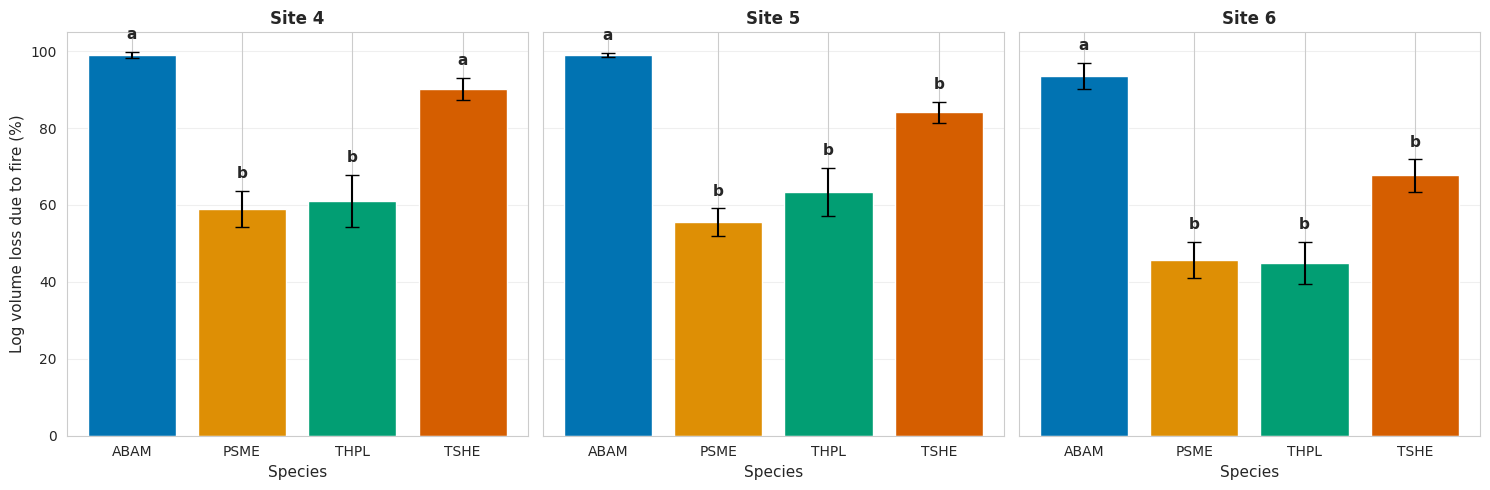

In [26]:
site_species_summary = df.groupby(['site', 'species'])['fire_reduction_percent'].agg(['mean', 'sem']).round(1)

colorblind_colors = sns.color_palette("colorblind", n_colors=4)

# Define significance groups for each site based on Dunn's test
sig_groups = {
    4: {'ABAM': 'a', 'PSME': 'b', 'THPL': 'b', 'TSHE': 'a'},
    5: {'ABAM': 'a', 'PSME': 'b', 'THPL': 'b', 'TSHE': 'b'},
    6: {'ABAM': 'a', 'PSME': 'b', 'THPL': 'b', 'TSHE': 'b'}
}

# Create subplots - one for each site
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sites = [4, 5, 6]
species_list = ['ABAM', 'PSME', 'THPL', 'TSHE']

for idx, (ax, site) in enumerate(zip(axes, sites)):
    site_data = site_species_summary.loc[site]
    means = site_data['mean'].values
    sems = site_data['sem'].values

    # Create bar positions
    x_pos = np.arange(len(species_list))

    # Plot bars
    bars = ax.bar(x_pos, means, yerr=sems, capsize=5, color=colorblind_colors)

    # Add significance letters
    for i, species in enumerate(species_list):
        letter = sig_groups[site][species]
        y_pos = means[i] + sems[i] + 2.5
        ax.text(i, y_pos, letter, ha='center', va='bottom',
                fontsize=11, fontweight='bold')

    # Formatting
    ax.set_xlabel('Species', fontsize=11)
    ax.set_title(f'Site {site}', fontsize=12, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(species_list)
    ax.grid(axis='y', alpha=0.3)

    if idx == 0:
        ax.set_ylabel('Log volume loss due to fire (%)', fontsize=11)

plt.tight_layout()
plt.show()

In [12]:
# Run Kruskal-Wallis test separately for each site
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

print("Site-specific Kruskal-Wallis tests:")
print("=" * 60)

site_sig_groups = {}

for site in df['site'].unique():
    site_data = df[df['site'] == site]
    species_groups = [group['fire_reduction_percent'].values
                      for name, group in site_data.groupby('species')]

    h_stat, p_val = kruskal(*species_groups)
    print(f"\nSite {site}:")
    print(f"  H-statistic: {h_stat:.4f}, p-value: {p_val:.4f}")

    if p_val < 0.05:
        # Run Dunn's test for this site
        dunn = posthoc_dunn(site_data, val_col='fire_reduction_percent',
                           group_col='species', p_adjust='bonferroni')
        print("  Post-hoc comparisons:")
        print(dunn.round(4))

Site-specific Kruskal-Wallis tests:

Site 6:
  H-statistic: 38.9576, p-value: 0.0000
  Post-hoc comparisons:
        ABAM   PSME    THPL    TSHE
ABAM  1.0000  0.000  0.0000  0.0181
PSME  0.0000  1.000  1.0000  0.1160
THPL  0.0000  1.000  1.0000  0.0839
TSHE  0.0181  0.116  0.0839  1.0000

Site 5:
  H-statistic: 54.9118, p-value: 0.0000
  Post-hoc comparisons:
        ABAM    PSME    THPL    TSHE
ABAM  1.0000  0.0000  0.0000  0.0052
PSME  0.0000  1.0000  1.0000  0.0002
THPL  0.0000  1.0000  1.0000  0.0764
TSHE  0.0052  0.0002  0.0764  1.0000

Site 4:
  H-statistic: 47.2615, p-value: 0.0000
  Post-hoc comparisons:
        ABAM  PSME    THPL    TSHE
ABAM  1.0000   0.0  0.0000  0.4577
PSME  0.0000   1.0  1.0000  0.0000
THPL  0.0000   1.0  1.0000  0.0005
TSHE  0.4577   0.0  0.0005  1.0000



1. NORMALITY OF RESIDUALS
----------------------------------------
Shapiro-Wilk test:
  Statistic: 0.9849
  P-value: 0.0068
  → Residuals may not be normally distributed (p < 0.05)


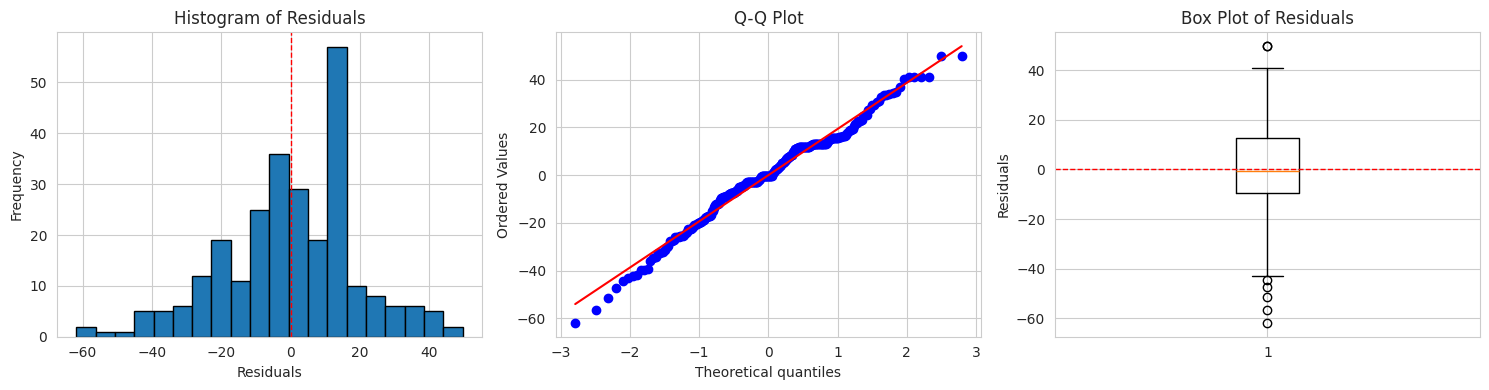


2. HOMOGENEITY OF VARIANCE
----------------------------------------
Levene's test for SITES:
  Statistic: 0.9938
  P-value: 0.3716
  → Variances are equal across sites (p > 0.05)

Levene's test for SPECIES:
  Statistic: 27.8575
  P-value: 0.0000
  → Variances may differ across species (p < 0.05)


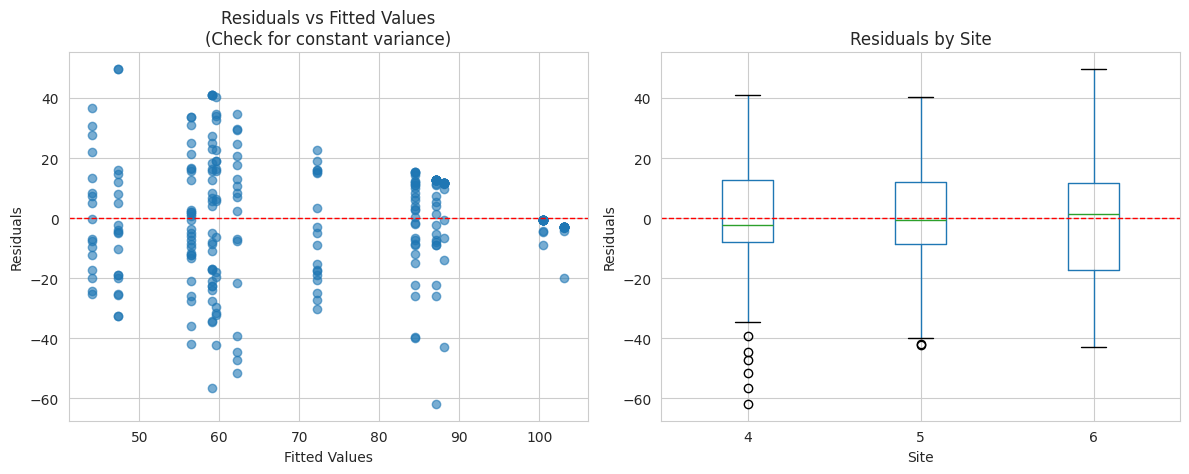

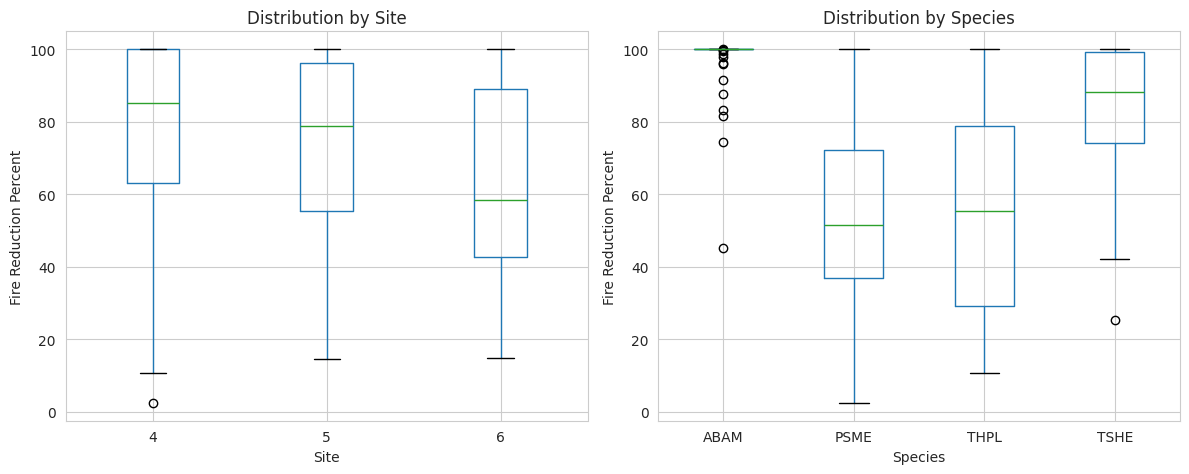


Variances by group:

By Site:
site
4    724.28
5    599.24
6    758.86
Name: fire_reduction_percent, dtype: float64

By Species:
species
ABAM     78.18
PSME    505.22
THPL    735.34
TSHE    338.52
Name: fire_reduction_percent, dtype: float64

SAMPLE SIZES

By Site:
site
4    97
5    96
6    72
dtype: int64

By Species:
species
ABAM    54
PSME    77
THPL    55
TSHE    79
dtype: int64

By Site and Species:
site  species
4     ABAM       18
      PSME       30
      THPL       18
      TSHE       31
5     ABAM       18
      PSME       30
      THPL       18
      TSHE       30
6     ABAM       18
      PSME       17
      THPL       19
      TSHE       18
dtype: int64


In [27]:
## ANOVA ASSUMPTIONS

# ===== 1. NORMALITY OF RESIDUALS =====
print("\n1. NORMALITY OF RESIDUALS")
print("-" * 40)

# Fit the model to get residuals
from statsmodels.formula.api import ols
model = ols('fire_reduction_percent ~ C(site) + C(species)', data=df).fit()
residuals = model.resid

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("  → Residuals are normally distributed (p > 0.05)")
else:
    print("  → Residuals may not be normally distributed (p < 0.05)")

# Visual checks for normality
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram of residuals
axes[0].hist(residuals, bins=20, edgecolor='black')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Residuals')
axes[0].axvline(0, color='red', linestyle='--', linewidth=1)

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')

# Box plot of residuals
axes[2].boxplot(residuals)
axes[2].set_ylabel('Residuals')
axes[2].set_title('Box Plot of Residuals')
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# ===== 2. HOMOGENEITY OF VARIANCE =====
print("\n2. HOMOGENEITY OF VARIANCE")
print("-" * 40)

# Levene's test for sites
site_groups = [group['fire_reduction_percent'].values for name, group in df.groupby('site')]
levene_stat_site, levene_p_site = stats.levene(*site_groups)
print(f"Levene's test for SITES:")
print(f"  Statistic: {levene_stat_site:.4f}")
print(f"  P-value: {levene_p_site:.4f}")
if levene_p_site > 0.05:
    print("  → Variances are equal across sites (p > 0.05)")
else:
    print("  → Variances may differ across sites (p < 0.05)")

# Levene's test for species
species_groups = [group['fire_reduction_percent'].values for name, group in df.groupby('species')]
levene_stat_species, levene_p_species = stats.levene(*species_groups)
print(f"\nLevene's test for SPECIES:")
print(f"  Statistic: {levene_stat_species:.4f}")
print(f"  P-value: {levene_p_species:.4f}")
if levene_p_species > 0.05:
    print("  → Variances are equal across species (p > 0.05)")
else:
    print("  → Variances may differ across species (p < 0.05)")

# Visual check: Residuals vs Fitted values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot residuals vs fitted values
fitted_values = model.fittedvalues
axes[0].scatter(fitted_values, residuals, alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted Values\n(Check for constant variance)')

# Box plots by group
df['residuals'] = residuals
df.boxplot(column='residuals', by='site', ax=axes[1])
axes[1].set_xlabel('Site')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals by Site')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
plt.suptitle('')

plt.tight_layout()
plt.show()

# Box plots of raw data by group
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='fire_reduction_percent', by='site', ax=axes[0])
axes[0].set_xlabel('Site')
axes[0].set_ylabel('Fire Reduction Percent')
axes[0].set_title('Distribution by Site')
plt.suptitle('')

df.boxplot(column='fire_reduction_percent', by='species', ax=axes[1])
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Fire Reduction Percent')
axes[1].set_title('Distribution by Species')
plt.suptitle('')

plt.tight_layout()
plt.show()

# Display variance by group
print("\nVariances by group:")
print("\nBy Site:")
print(df.groupby('site')['fire_reduction_percent'].var().round(2))
print("\nBy Species:")
print(df.groupby('species')['fire_reduction_percent'].var().round(2))

# Check sample sizes
print("\n" + "=" * 60)
print("SAMPLE SIZES")
print("=" * 60)
print("\nBy Site:")
print(df.groupby('site').size())
print("\nBy Species:")
print(df.groupby('species').size())
print("\nBy Site and Species:")
print(df.groupby(['site', 'species']).size())

In [28]:
#  Test for differences among SITES (one-way ANOVA)
print("Testing for differences among sites:")
site_groups = [group['fire_reduction_percent'].values for name, group in df.groupby('site')]
f_stat, p_value = stats.f_oneway(*site_groups)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences exist among sites (p < 0.05)\n")
else:
    print("No significant differences among sites (p >= 0.05)\n")

# Post-hoc Tukey HSD for pairwise comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\nPost-hoc Tukey HSD test for sites:")
tukey_sites = pairwise_tukeyhsd(endog=df['fire_reduction_percent'],
                                 groups=df['site'],
                                 alpha=0.05)
print(tukey_sites)

Testing for differences among sites:
F-statistic: 6.1571
P-value: 0.0024
Significant differences exist among sites (p < 0.05)


Post-hoc Tukey HSD test for sites:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     4      5  -2.7344 0.7495 -11.6372  6.1685  False
     4      6 -13.8004 0.0024 -23.4201 -4.1806   True
     5      6  -11.066 0.0198  -20.707 -1.4249   True
-----------------------------------------------------


In [29]:
# For SPECIES: Use Kruskal-Wallis due to unequal variances
print("\n2. TESTING DIFFERENCES AMONG SPECIES")
print("-" * 40)
species_groups = [group['fire_reduction_percent'].values for name, group in df.groupby('species')]
h_stat_species, p_value_species = kruskal(*species_groups)
print(f"Kruskal-Wallis test (species):")
print(f"  H-statistic: {h_stat_species:.4f}")
print(f"  P-value: {p_value_species:.4f}")
if p_value_species < 0.05:
    print("  → Significant differences exist among species (p < 0.05)")
else:
    print("  → No significant differences among species (p ≥ 0.05)")

# Post-hoc tests
if p_value_species < 0.05:
    print("\n" + "=" * 60)
    print("POST-HOC TESTS FOR SPECIES (Dunn's test)")
    print("=" * 60)

# Run Dunn's test with Bonferroni correction
dunn_species = posthoc_dunn(df, val_col='fire_reduction_percent',
                            group_col='species', p_adjust='bonferroni')

print("\nPairwise comparisons (Bonferroni-adjusted p-values):")
print(dunn_species.round(4))

print("\nInterpretation:")
print("Values < 0.05 indicate significant differences between species pairs")


2. TESTING DIFFERENCES AMONG SPECIES
----------------------------------------
Kruskal-Wallis test (species):
  H-statistic: 129.8177
  P-value: 0.0000
  → Significant differences exist among species (p < 0.05)

POST-HOC TESTS FOR SPECIES (Dunn's test)

Pairwise comparisons (Bonferroni-adjusted p-values):
      ABAM  PSME  THPL  TSHE
ABAM   1.0   0.0   0.0   0.0
PSME   0.0   1.0   1.0   0.0
THPL   0.0   1.0   1.0   0.0
TSHE   0.0   0.0   0.0   1.0

Interpretation:
Values < 0.05 indicate significant differences between species pairs


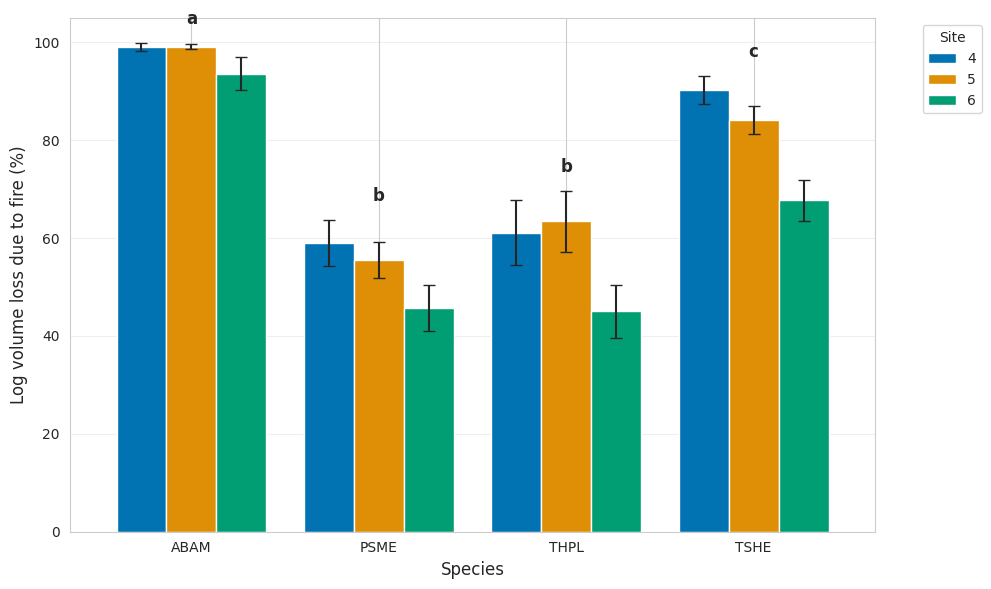

In [32]:
# Prep data - group by spp
species_site_summary = df.groupby(['species', 'site'])['fire_reduction_percent'].agg(['mean', 'sem']).round(1)

colorblind_colors = sns.color_palette("colorblind", n_colors=3)  # 3 colors for 3 sites

# Define sig groups - the OVERALL spp differences from Kruskal-Wallis across all sites
overall_sig_groups = {
    'ABAM': 'a',
    'PSME': 'b',
    'THPL': 'b',
    'TSHE': 'c'
}

# Unstack to get sites as columns
plot_data = species_site_summary['mean'].unstack()
error_data = species_site_summary['sem'].unstack()

fig, ax = plt.subplots(figsize=(10, 6))

plot_data.plot(kind='bar', ax=ax, yerr=error_data, capsize=4, width=0.8, color=colorblind_colors)

ax.set_xlabel('Species', fontsize=12)
ax.set_ylabel('Log volume loss due to fire (%)', fontsize=12)
ax.legend(title='Site', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

# Add sig letters for overall species differences
species_list = plot_data.index.tolist()
sites = plot_data.columns.tolist()
n_sites = len(sites)

for species_idx, species in enumerate(species_list):
    # Get the max height for sig letter placement
    max_height = 0
    for site in sites:
        height = plot_data.loc[species, site] + error_data.loc[species, site]
        if height > max_height:
            max_height = height

    letter = overall_sig_groups[species]
    ax.text(species_idx, max_height + 3, letter,
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

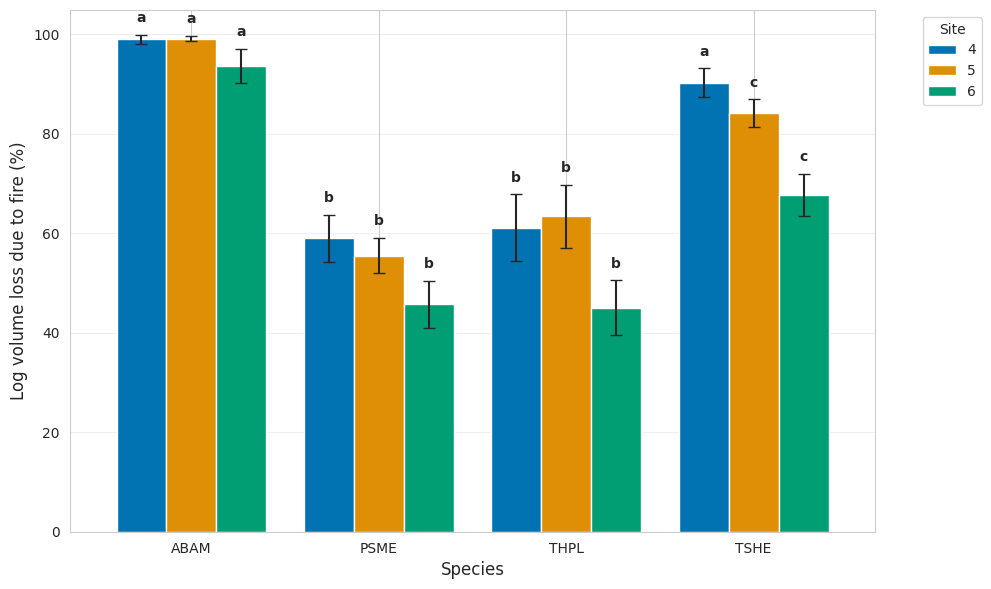

In [33]:
# Prep data - group by species and site
species_site_summary = df.groupby(['species', 'site'])['fire_reduction_percent'].agg(['mean', 'sem']).round(1)

colorblind_colors = sns.color_palette("colorblind", n_colors=3)  # 3 colors for 3 sites

# Define sig groups at the SITE x SPECIES level from Kruskal-Wallis results
site_sig_groups = {
    4: {'ABAM': 'a', 'PSME': 'b', 'THPL': 'b', 'TSHE': 'a'},
    5: {'ABAM': 'a', 'PSME': 'b', 'THPL': 'b', 'TSHE': 'c'},
    6: {'ABAM': 'a', 'PSME': 'b', 'THPL': 'b', 'TSHE': 'c'}
}

# Unstack to get sites as columns
plot_data = species_site_summary['mean'].unstack()
error_data = species_site_summary['sem'].unstack()

fig, ax = plt.subplots(figsize=(10, 6))

plot_data.plot(kind='bar', ax=ax, yerr=error_data, capsize=4, width=0.8, color=colorblind_colors)

ax.set_xlabel('Species', fontsize=12)
ax.set_ylabel('Log volume loss due to fire (%)', fontsize=12)
ax.legend(title='Site', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

# Add sig letters for each site x species combination
species_list = plot_data.index.tolist()
sites = plot_data.columns.tolist()
bar_width = 0.8 / len(sites)  # Width of each bar
bar_positions_offset = [-bar_width, 0, bar_width]  # Offsets for 3 sites

for species_idx, species in enumerate(species_list):
    for site_idx, site in enumerate(sites):
        height = plot_data.loc[species, site] + error_data.loc[species, site]
        letter = site_sig_groups[site][species]

        # Calculate x position for each bar
        x_pos = species_idx + bar_positions_offset[site_idx]

        ax.text(x_pos, height + 2, letter,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

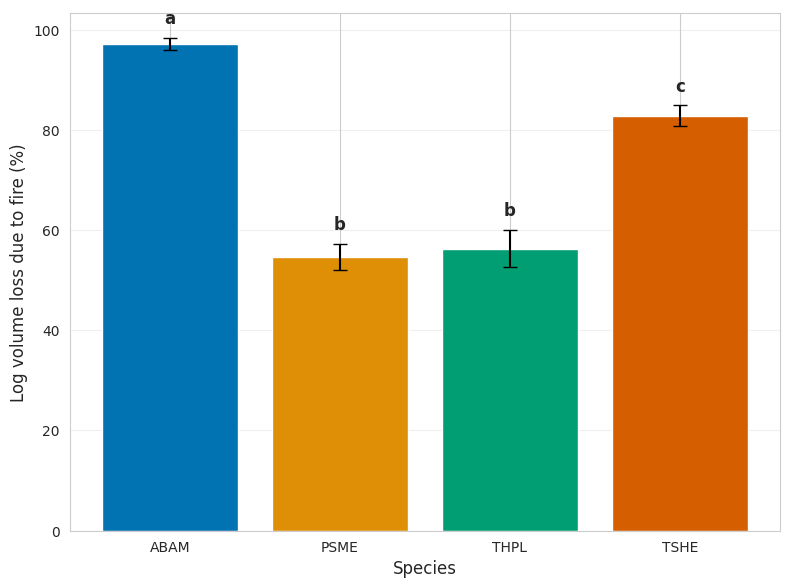

Overall Species Summary:
         mean  sem
species           
ABAM     97.2  1.2
PSME     54.7  2.6
THPL     56.3  3.7
TSHE     82.8  2.1


In [18]:
# Calculate overall mean and SEM for each species (across all sites)
overall_species_summary = df.groupby('species')['fire_reduction_percent'].agg(['mean', 'sem']).round(1)

colorblind_colors = sns.color_palette("colorblind", n_colors=4)

# Define significance groups from Kruskal-Wallis test across all sites
sig_groups = {
    'ABAM': 'a',
    'PSME': 'b',
    'THPL': 'b',
    'TSHE': 'c'
}

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

species_list = overall_species_summary.index.tolist()
means = overall_species_summary['mean'].values
sems = overall_species_summary['sem'].values

# Create bars
x_pos = np.arange(len(species_list))
bars = ax.bar(x_pos, means, yerr=sems, capsize=5, color=colorblind_colors)

# Add significance letters
for i, species in enumerate(species_list):
    letter = sig_groups[species]
    y_pos = means[i] + sems[i] + 2
    ax.text(i, y_pos, letter, ha='center', va='bottom',
            fontsize=12, fontweight='bold')

# Formatting
ax.set_xlabel('Species', fontsize=12)
ax.set_ylabel('Log volume loss due to fire (%)', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(species_list)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, ax.get_ylim()[1])

plt.tight_layout()
plt.show()

# Print the summary statistics
print("Overall Species Summary:")
print(overall_species_summary)

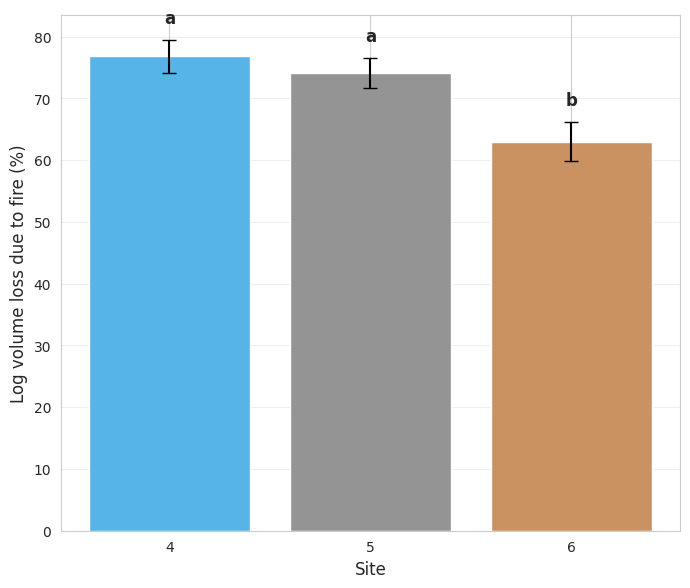

Overall Site Summary:
      mean  sem
site           
4     76.8  2.7
5     74.1  2.5
6     63.0  3.2


In [20]:
# Calculate overall mean and SEM for each site (across all species)
overall_site_summary = df.groupby('site')['fire_reduction_percent'].agg(['mean', 'sem']).round(1)

colorblind_colors = [sns.color_palette("colorblind")[i] for i in [9, 7, 5]]

# Define significance groups based on Tukey HSD results
# Sites 4 and 5 are not significantly different (p=0.7495) -> share 'a'
# Site 6 is different from both 4 and 5 -> gets 'b'
site_sig_groups = {
    4: 'a',
    5: 'a',
    6: 'b'
}

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 6))

site_list = overall_site_summary.index.tolist()
means = overall_site_summary['mean'].values
sems = overall_site_summary['sem'].values

# Create bars
x_pos = np.arange(len(site_list))
bars = ax.bar(x_pos, means, yerr=sems, capsize=5, color=colorblind_colors)

# Add significance letters
for i, site in enumerate(site_list):
    letter = site_sig_groups[site]
    y_pos = means[i] + sems[i] + 2
    ax.text(i, y_pos, letter, ha='center', va='bottom',
            fontsize=12, fontweight='bold')

# Formatting
ax.set_xlabel('Site', fontsize=12)
ax.set_ylabel('Log volume loss due to fire (%)', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(site_list)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, ax.get_ylim()[1])

plt.tight_layout()
plt.show()

# Print the summary statistics
print("Overall Site Summary:")
print(overall_site_summary)